# PyGMT Tutorial IGP 2022

En este taller aprenderán:

1) Realizar un mapa con topografía

2) Graficar localizaciones de estaciones sismológicas

3) Graficar localizaciones de terremotos

Primeros comandos.

Instalaciòn de PyGMT

Crear un ambiente e instalar lo necesario para correr el siguiente código. Utilizar el siguiente comando:

conda create --name pygmt python=3.9 numpy pandas xarray netcdf4 packaging gmt

In [3]:
# Agradecimientos a M. Leoncio Cabrera, U. de Grenoble, Francia.

# Importar todos los paquetes necesarios
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pygmt
import glob
import os
import utm
from obspy.core import UTCDateTime

In [4]:
# Initializar el área de la figura para preparar el mapa
fig1 = pygmt.Figure()

# Formato del mapa, GEOGRÁFICO EN GRADOS GEODÉSICOS
pygmt.config(FORMAT_GEO_MAP='D')  # Usa grados decimales
# Formato del tamaño de letra
pygmt.config(FONT='15p')

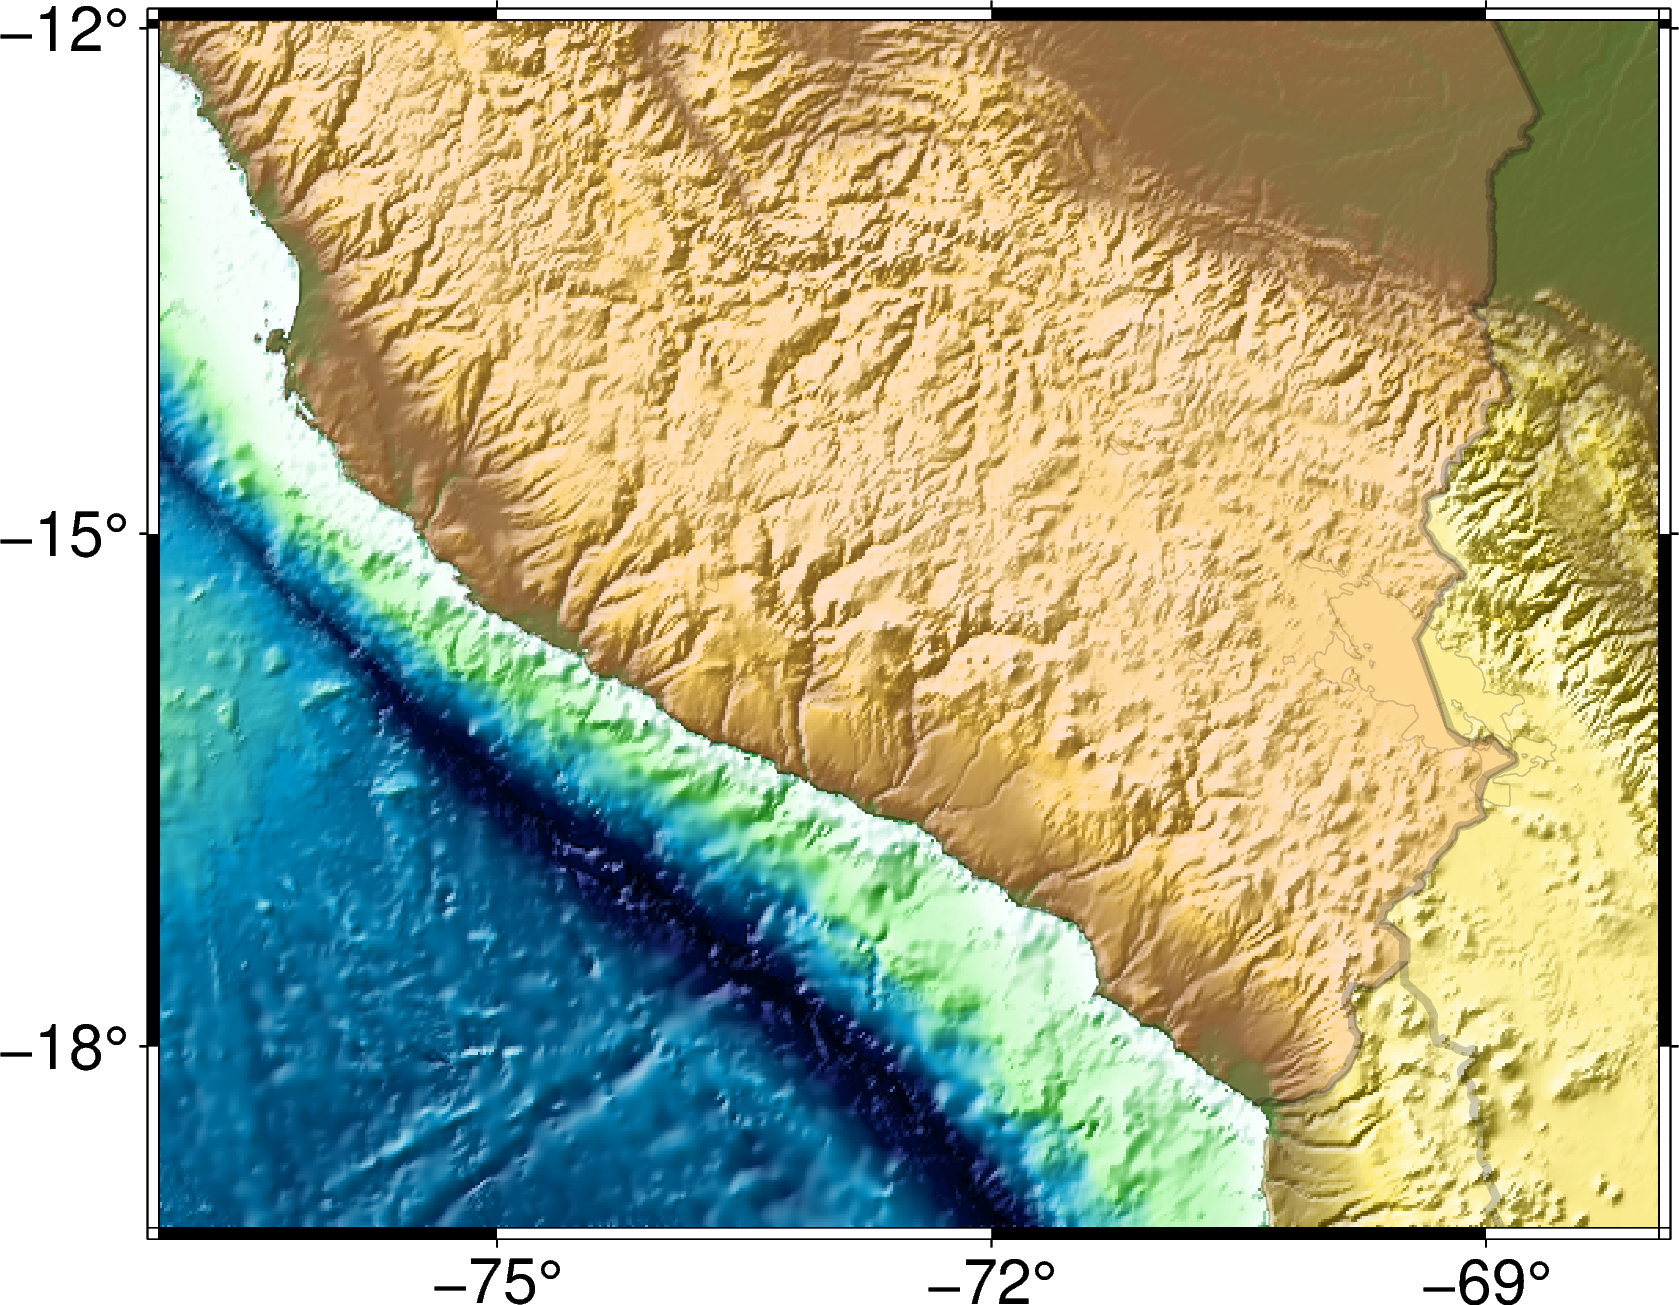

In [5]:
# Coordenadas máximas y mínimas del mapa
min_lat = -18
max_lat = -13
min_lon = -76
max_lon = -69
# Damos un poco de margen a los extremos
canvas = (max_lon - min_lon)*0.15

# Cargar y graficar topografía
fig1.grdimage(
    '@earth_relief_01m',  #DATABASE FORM INTERNET
    region=[min_lon-canvas, max_lon+canvas, min_lat-canvas, max_lat+canvas],
    projection='M5i',
    cmap='relief',
    #frame=['WSne','a0.2f0.2']
    shading=True,
    #transparency=70
    frame=['WSne','ag','3p']
)

# Graficar las lineas de costa y areas de tierra y oceanos
fig1.coast(
    region=[min_lon-canvas, max_lon+canvas, min_lat-canvas, max_lat+canvas],
    projection='M5i',
    shorelines='0.25p,black', 
    # Nivel de Linea1-4 / Ancho de lapiz , color
    water=None,
    borders="1/2p,black",
    land=None,
    resolution="f",
    dcw="PE+glightred+p0.5p",
    transparency=80,
)
fig1.show()

In [6]:
# Cargar datos de longitud y latitud de dos diferentes redes

# Red PE
pe_stations_lat, pe_stations_lon = np.loadtxt('pe_stations.dat', dtype=float, delimiter=" ", usecols=(1, 2), unpack=True)
# Red DT
dt_stations_lat, dt_stations_lon = np.loadtxt('6b_stations.dat', dtype=float, delimiter=" ", usecols=(1, 2), unpack=True)

# Cargar las localizaciones de los eventos sismicos
# latitud y longitud
events_lat, events_lon = np.loadtxt('evento_2022.dat', dtype=float, delimiter=" ", usecols=(0, 1), unpack=True)


# Leer los nombres de las estaciones de cada red

# Red PE
with open('pe_stations.dat') as f:
    lines = f.read().splitlines()
# Guardar nombre de las estaciones
station_names_pe = []
for line in lines:
    station_names_pe.append(line.split(' ')[0])
# Número de estaciones de la red PE
n_stations_pe = len(station_names_pe)

# Red DT
with open('6b_stations.dat') as f:
    lines = f.read().splitlines()
# Guardar nombre de las estaciones
station_names_dt = []
for line in lines:
    station_names_dt.append(line.split(' ')[0])
# Número de estaciones de la red PE
n_stations_dt = len(station_names_dt)

In [7]:
# Graficar estaciones red PE
fig1.plot(
    x=pe_stations_lon,
    y=pe_stations_lat,
    style='i0.4',  # i = inverted triangles
    projection='M5i',
    color='black',
    pen='2.0p,white',
    #style='c0.005',
    #color='violet',
    #pen='0.001,black',
    label='PE_Stations'
)

# Graficar estaciones red DT
fig1.plot(
    x=dt_stations_lon,
    y=dt_stations_lat,
    style='c0.3',
    color='black',
    pen='2.0p,white',
    #style='c0.005',
    #color='violet',
    #pen='0.001,black',
    label='DT_Stations'
)



In [8]:
# Imprimir nombre de las estaciones red PE
for i in range(n_stations_pe):
    fig1.text(
        x=pe_stations_lon[i],
        y=pe_stations_lat[i],
        text=station_names_pe[i],
        offset="0/0.3",
        font="8p,Helvetica-Bold,blue", 
        fill="white"        
    )

# Imprimir nombre de las estaciones red DT
for i in range(n_stations_dt):
    fig1.text(
        x=dt_stations_lon[i],
        y=dt_stations_lat[i],
        text=station_names_dt[i],
        offset="0/0.3",
        font="8p,Helvetica-Bold,red", 
        fill="white"        
    )

In [9]:
# Graficar localización de eventos sísmicos
fig1.plot(
    x=events_lon,
    y=events_lat,
    style='a0.6',
    color='red',
    pen='1.0p,white',
    #style='c0.005',
    #color='violet',
    #pen='0.001,black',
    label='event'
)

In [10]:
## Graficar un círculo centrado en una localización
## y con un radio específico

#lat = events_lat   #center
#lon = events_lon 
#r = 1  # radius in degrees
#th = np.linspace(0,2.*np.pi,360)
#xun = []
#yun = []
#for t in th:
#    xun.append( r * np.cos(t) + lon)
#    yun.append( r * np.sin(t) + lat)    
#fig1.plot(x=xun, y=yun, projection="M5i", pen="5p,blue")
#fig1.show()

In [11]:
# Graficar un rectángulo en cierta posicón

# Coordenadas de las esquinas del rectángulo
rec_y = [ -16, -14.5, -14.5, -16, -16]
rec_x = [ -71.2, -71.2, -69.5, -69.5, -71.2]

# Graficar el rectángulo
fig1.plot(x=rec_x, y=rec_y, projection="M5i", pen="3p,red")

In [12]:
# Graficar rectángulo en un mapa pequeño para delimitar el área
# de estudio

# Coordenadas del rectángulo
rectangle_x = [min_lon-canvas, min_lon-canvas, max_lon+canvas, max_lon+canvas, min_lon-canvas]
rectangle_y = [min_lat-canvas, max_lat+canvas, max_lat+canvas, min_lat-canvas, min_lat-canvas]

# Graficar el mapa pequeño adentro del gran mapa
#with fig1.inset(position="gjTR+w3c+o0.2c", margin=0, box="none"):
with fig1.inset(position="jTR+w3c+o0.2c", margin=0, box="none"):
    fig1.coast(
        region=[-90,-30,-40,40],
        projection="M1.5i",
        land="brown",
        water="gray",
        dcw="PE+gyellow",
    )
    fig1.plot(x=rectangle_x, y=rectangle_y, projection="M1.5i", pen="4p,blue")

legend [WARNING]: Length <unit> e not supported - revert to default unit [point]
legend [WARNING]: 1pwhit not a valid number and may not be decoded properly.


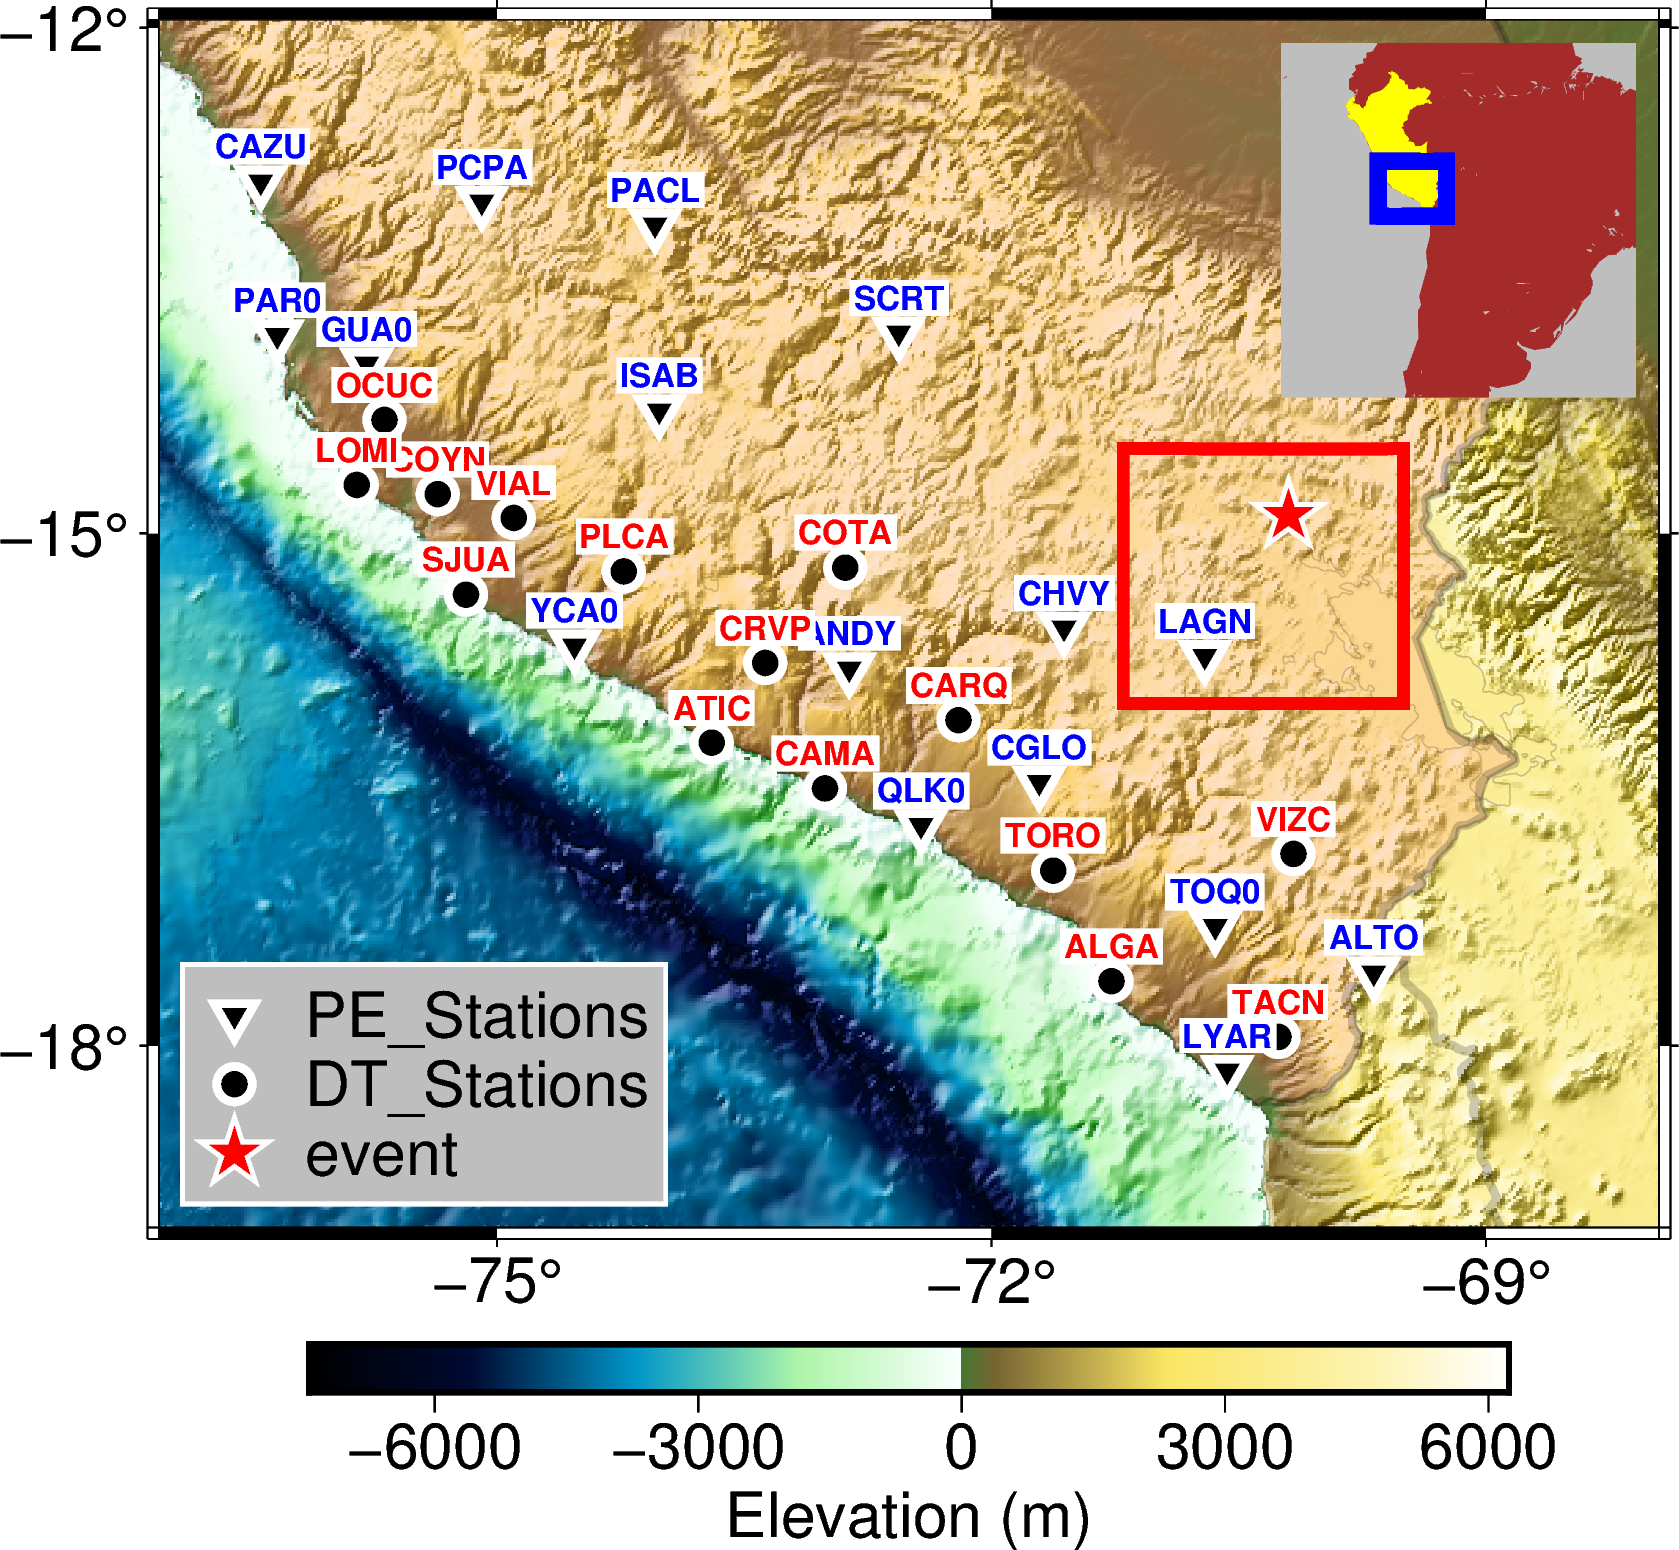

In [13]:
# Agregar leyenda al map, colorbar de elevación y mostrar mapa
fig1.legend(box='+ggray+p1pwhite,white',position='JBL+jBL+o0.2c')
fig1.colorbar(frame='a3000+l"Elevation (m)"')
fig1.show()
fig1.savefig('Map_Peru.png')


# Ejercicio 2

Algunos eventos en el Sur, datos tomados del catálogo online del IGP.

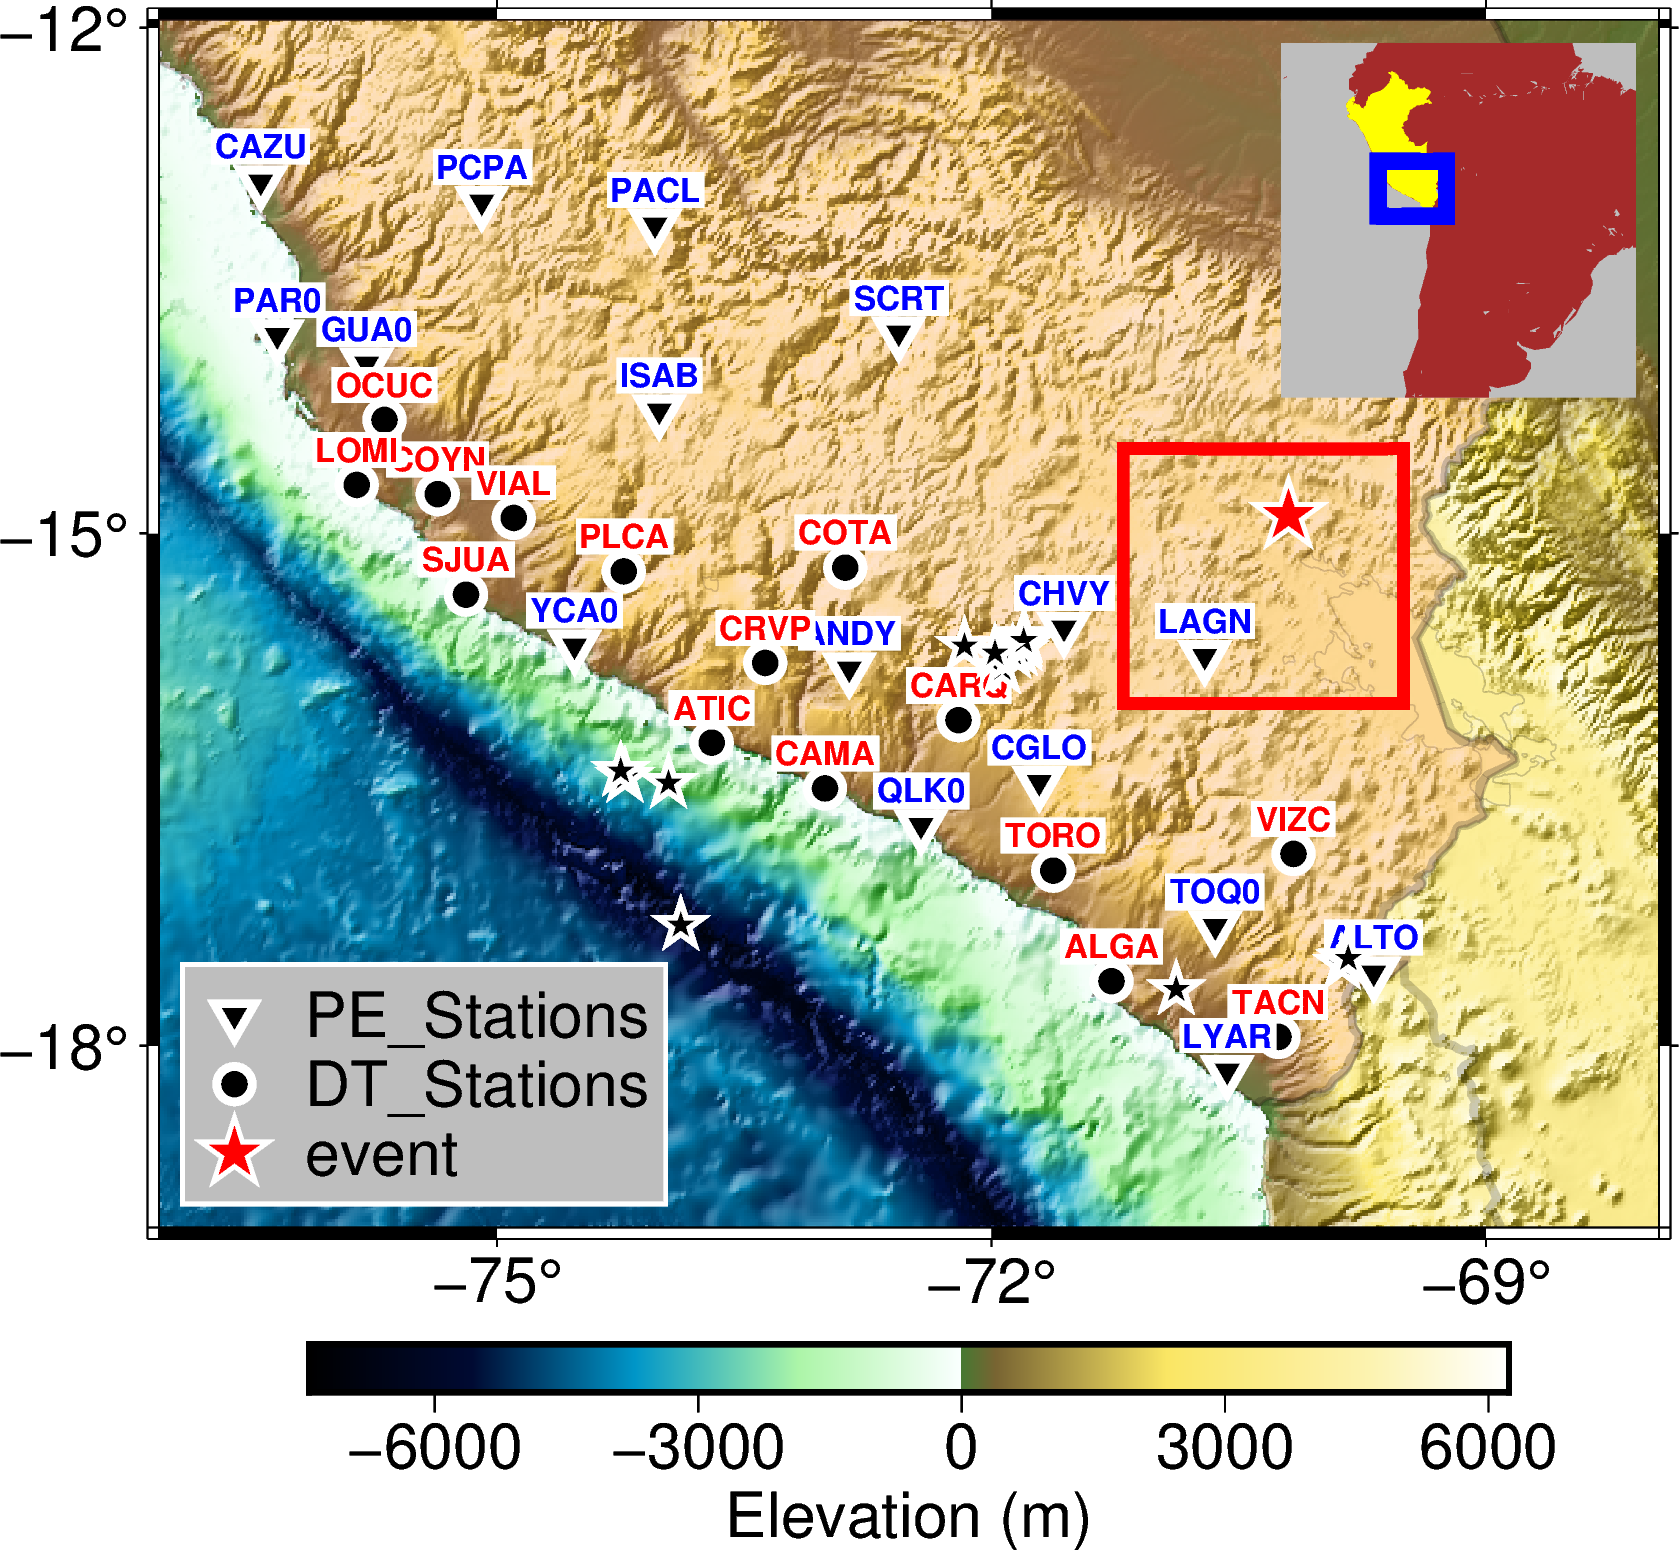

In [17]:
# Cargar las localizaciones de los eventos sismicos
# latitud y longitud
eventos_lat, eventos_lon = np.loadtxt('eventos_2022_sur.dat', dtype=float, delimiter=" ", usecols=(2, 3), unpack=True)

# Graficar localización de eventos sísmicos
fig1.plot(
    x=eventos_lon,
    y=eventos_lat,
    style='a0.4',
    color='black',
    pen='1.2p,white',
    #style='c0.005',
    #color='violet',
    #pen='0.001,black',
    label='event'
)
fig1.show()